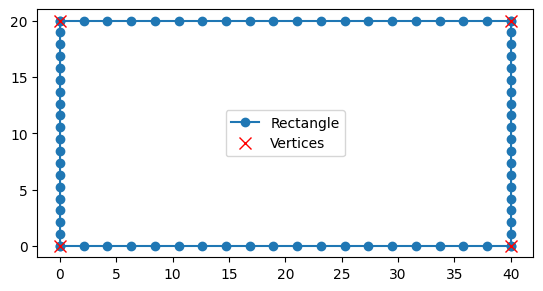

In [1]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt

def extract_rectangle_points(dxf_file, num_points_per_edge=20):
    doc = ezdxf.readfile(dxf_file)
    msp = doc.modelspace()
    rectangles_data = []

    for pl in msp.query("LWPOLYLINE POLYLINE"):
        # 只取XY坐标，避免解包错误
        vertices = list(pl.get_points("xy"))
        points = []
        for i in range(len(vertices)):
            x1, y1 = vertices[i]
            x2, y2 = vertices[(i+1) % len(vertices)]
            xs = np.linspace(x1, x2, num_points_per_edge)
            ys = np.linspace(y1, y2, num_points_per_edge)
            points.extend(list(zip(xs, ys)))
        rectangles_data.append({
            "vertices": vertices,
            "points": points
        })

    return rectangles_data


def visualize_rectangles(rectangles_data):
    fig, ax = plt.subplots()
    for rect in rectangles_data:
        # 绘制离散点
        xs, ys = zip(*rect["points"])
        ax.plot(xs, ys, 'o-', label="Rectangle")

        # 绘制顶点标记
        vx, vy = zip(*rect["vertices"])
        ax.plot(vx, vy, 'rx', markersize=8, label="Vertices")

    ax.set_aspect('equal')
    ax.legend()
    plt.show()


# 示例调用
rectangles = extract_rectangle_points("rect.dxf", num_points_per_edge=20)
visualize_rectangles(rectangles)